In [1]:

import pandas as pd
import numpy as np
import random
from scipy.stats import loguniform, lognorm
from scipy import stats
import time
import math
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Load and format the data

In [4]:
import pandas as pd
import numpy as np

def npy2df(input_file, return_gene_info=False):
    """
    Load the npy file with X number of bursting parameter estimation for a given gene. 
    if return_gene_info is True : 
        return the df containing the estimation, the gene index number (starting from 1, not 0) and a gene array of some sort?
    else: return the dataframe with the parameter estimation as column and each estimation attemps as rows
        
    """
    gene_no, gene, result = np.load(input_file, allow_pickle='True')
    
    result_flatten = result.flatten()
    df = pd.DataFrame([x for x in result_flatten])
    
    if return_gene_info:
        return(df, gene_no, gene)
    else:
        return(df)

In [5]:
%ls data\test

 Volume in drive C is Windows
 Volume Serial Number is 24D1-4189

 Directory of C:\SHRR\TUM\Thesis\transcriptional_bursting\BayesGTM\data\test

11/07/2022  15:32    <DIR>          .
11/07/2022  15:32    <DIR>          ..
11/07/2022  15:07             6,099 gene_Mrpl15_total_100N_5T.npy
11/07/2022  14:39             5,649 gene_Mrpl15_total_10N_5T.npy
11/07/2022  14:37             5,599 gene_Mrpl15_total_1N_1T.npy
11/07/2022  14:37             5,604 gene_Mrpl15_total_1N_5T.npy
11/07/2022  15:32             6,599 gene_Mrpl15_total_200N_5T.npy
11/07/2022  14:41             5,699 gene_Mrpl15_total_20N_5T.npy
11/07/2022  14:47             5,799 gene_Mrpl15_total_40N_5T.npy
               7 File(s)         41,048 bytes
               2 Dir(s)  361,656,037,376 bytes free


In [18]:
test = np.load('data/test/gene_Mrpl15_total_100N_5T.npy', allow_pickle='True')
test

array(['Mrpl15',
       array([ 13.,  16.,  22.,  25.,  29.,  30.,  41.,  42.,  46.,  50.,  51.,
               54.,  55.,  57.,  58.,  58.,  59.,  59.,  61.,  61.,  62.,  62.,
               62.,  63.,  64.,  66.,  67.,  67.,  68.,  69.,  69.,  71.,  73.,
               75.,  75.,  75.,  76.,  76.,  77.,  77.,  79.,  79.,  79.,  79.,
               79.,  80.,  82.,  85.,  86.,  87.,  88.,  89.,  89.,  90.,  91.,
               92.,  94.,  96.,  99., 100., 101., 101., 102., 102., 103., 103.,
              103., 104., 109., 109., 109., 110., 111., 111., 113., 113., 113.,
              116., 117., 119., 119., 120., 121., 121., 123., 124., 125., 125.,
              126., 127., 128., 129., 130., 132., 134., 135., 135., 135., 136.,
              136., 136., 136., 137., 138., 139., 140., 141., 141., 142., 142.,
              142., 143., 143., 144., 144., 144., 145., 145., 146., 146., 146.,
              146., 147., 147., 148., 148., 148., 148., 149., 149., 151., 152.,
              155., 156

In [7]:
def BFandBS(df):
    """
    input is the dataframe containing the parameters as columns.
    need column named 'koff', 'roff', 'kon', 'ron' 
    
    compute burst frequency and burst size from the parameters
    """
    df['tau_off']= df['kon']/df['ron']
    df['tau_on'] = df['koff']/df['roff']
    df['bf'] = 1./(df['tau_on'] + df['tau_off'])
    df['bs'] = df['mu'] * df['tau_on']

In [8]:
BFandBS(df)
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs
0,1.904311,1.385721,0.301618,0.110846,9.952520,1.0,0.077926,1.374239,2.721045,0.244183,27.081251
1,6.695901,3.917049,1.220941,0.357893,9.956555,1.0,0.354628,1.709425,3.411469,0.195278,33.966475
2,0.929153,0.228156,9.630068,0.794667,7.501914,1.0,0.306763,4.072447,12.118367,0.061763,90.910942
3,3.049946,0.761233,5.408903,0.604218,8.436992,1.0,0.164991,4.006589,8.951903,0.077169,75.527133
4,5.513423,0.884510,2.258884,0.127123,9.053917,1.0,0.217553,6.233304,17.769342,0.041662,160.882148
...,...,...,...,...,...,...,...,...,...,...,...
4995,1.573530,1.122485,3.302490,3.084868,21.376872,1.0,0.572193,1.401827,1.070545,0.404470,22.884902
4996,4.799188,0.268085,5.500434,0.121556,7.370739,1.0,0.328326,17.901759,45.250367,0.015835,333.528632
4997,4.113399,0.772256,4.873750,0.331596,9.531111,1.0,0.230112,5.326471,14.697863,0.049939,140.086974
4998,6.012762,2.380517,11.299651,2.316180,11.818392,1.0,0.254261,2.525822,4.878572,0.135055,57.656875


In [9]:
df['log_kon'] = [np.log10(x) for x in df['kon']]
df['log_koff'] = [np.log10(x) for x in df['koff']]

In [10]:
df['log_bs'] = [np.log10(x) for x in df['bs']]
df['log_bf'] = [np.log10(x) for x in df['bf']]

# Smooth kernel density 

Kernel density estimate KDE


In [11]:
from scipy.stats import gaussian_kde
def best_parameters(df, density_kernel_name=None, save_kde=False):
    """
    return the index for the best parameters.
    
    if density_kernel_name is None , we recompute the gaussian kde and if save_kde is a str. 
    Save the kde in df using save_kde as column name
    """
    
    if density_kernel_name is None:
        # Calculate the point density
        xy = np.vstack([df['bs'],df['bf']])
        z = gaussian_kde(xy)(xy)
        if save_kde is not False:
            df[save_kde] = z
            
    else:
        z = df[density_kernel_name]
    
    return(np.where(z == np.amax(z))[0][0])

        

In [12]:
best_parameters(df, save_kde='density_kernel')

503

In [13]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.color_palette("viridis")

def plot_kde(df, bs, bf, kde="density_kernel",
             title=None, dot_size=4, colormap='viridis',
             best_param=True,
             linestype='-', color_line='grey',
             norm_scale=True,
             show=True,
             save=None):
    """
    

    --> put the line with best parameter as an option..
    
    --> later we need to create a wrapper function to give a adata objet + a gene name
    
    df
    bs
    df
    kde="density_kernel"
    title
    size
    colormap
    best_param
    linestype
    color_line
    norm_scale
    show
    save
    """
    
    # scatter plot
    if norm_scale:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, size_norm=(0,1),
                              palette=colormap, s=dot_size)
    else:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, hue_norm=(np.min(df['density_kernel']),
                                                 np.max(df['density_kernel'])),
                              palette=colormap, s=dot_size)
    
    if title is not None: 
        fig.set_title(title)
    
    #plt.legend(loc=legend_loc)
    plt.legend(bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0,
              title='kernel density')
    
    if best_param : 
    
        # Add the best parameter estimation based on the density kernel
        index_max_parameter = best_parameters(df, save_kde="density_kernel")
        xmax = df[bs][index_max_parameter]
        ymax = df[bf][index_max_parameter]
        fig.axvline(ymax, color="grey", linestyle="-.", linewidth=0.5) #linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
        fig.axhline(xmax, color="grey", linestyle="-.", linewidth=0.5)
    
    
    # plot / saving settings
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    if show :
        plt.show()

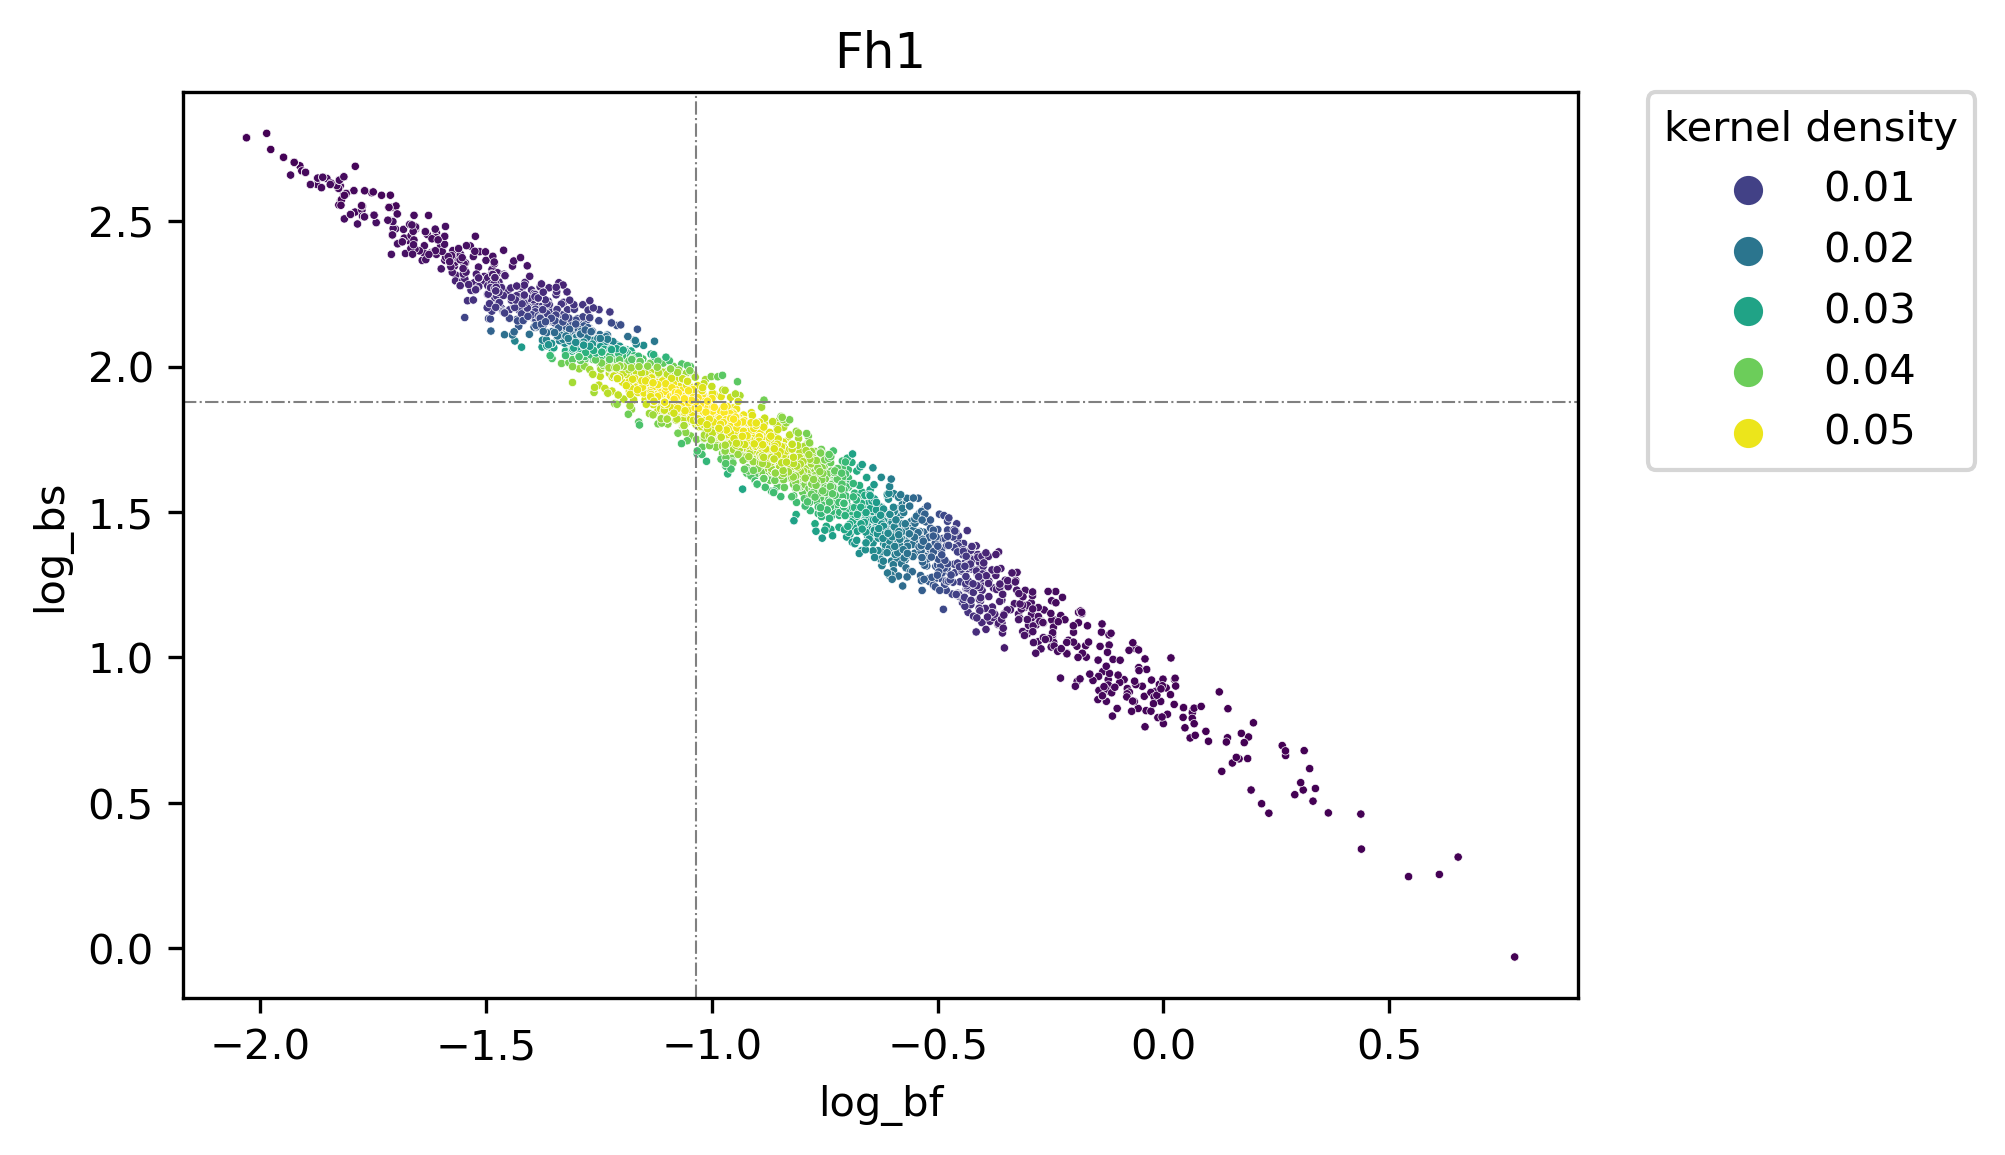

In [14]:
plot_kde(df, bs="log_bs", bf="log_bf", title="Fh1", dot_size=4, save="Fh1_kde_scatterplot.png")

In [15]:
# normalise the kernel density scale between 0 and 1 
sns.scatterplot?

In [16]:
# df.iloc[2851]

kon                3.337874
ron                1.509647
koff               3.073751
roff               0.700595
mu                 8.975618
delta              1.000000
dist               0.298402
tau_off            2.211030
tau_on             4.387347
bf                 0.151552
bs                39.379149
log_kon            0.523470
log_koff           0.487669
log_bs             1.595266
log_bf            -0.819437
density_kernel     0.041241
Name: 2851, dtype: float64